<a href="https://colab.research.google.com/github/veiro/tesis-imputacion-datos/blob/main/codigo/prediccion/pruebas_prediccion/Prueba_de_prediccion_numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
Utilizar el mejor modelo encontrado para predecir un atributo numerico con el dataset-GAIN

# Configuracion ambiente

In [ ]:
USAR_GOOGLE_DRIVE =  True
MODO_DESARROLLO = False

In [ ]:
!pip install "joblib==1.3.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


In [ ]:
!pip install "pandas<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 100.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install "pycaret==3.3.0."

#https://pycaret.gitbook.io/docs/get-started/tutorials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84

In [ ]:
import os
import sys
import random
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
%%time
if (USAR_GOOGLE_DRIVE):
  drive.mount('/content/gdrive')
  PATH_DATA_PROCESADA = "/content/gdrive/MyDrive/Maestria/Tesis/Codigo/data/data-procesada"
  sys.path.append('/content/gdrive/MyDrive/Maestria/Tesis/Codigo/utils')

else:
  PATH_DATA_PROCESADA = "/mnt/data"
  sys.path.append('/mnt/utils')

import utils as utils

import importlib
importlib.reload(utils)


if (30  ==  utils.version()):
  print("version correcta")
else:
  raise Exception("Version de Util vieja")





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
version correcta
CPU times: user 11.9 ms, sys: 5.9 ms, total: 17.8 ms
Wall time: 2.45 s


## regresion

In [ ]:
from pycaret.regression import *
resultados = pd.DataFrame()
def prediccionNumerico(files):
  global resultados
  ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'regresion_deaths_Desarrollo=False'
  loaded_best_pipeline = load_model(ruta_modelo)

  for fp in  files:
    print(fp)
    data_full = pd.read_csv(PATH_DATA_PROCESADA+'/'+fp)
    if(MODO_DESARROLLO):
      data =  data_full.sample(n=10000, random_state=1)
    else:
      data = data_full
    s = setup(data, target = 'Deaths', session_id = 123, verbose = False)
    predict_model(loaded_best_pipeline, data = data)
    salida =pull()
    salida.insert(0, "Dataset", utils.prettyPrintName(fp), allow_duplicates=False)
    resultados = pd.concat([resultados, salida], axis=0)
    del data_full
    del data
    del s
    del salida
    print("----------------------------------------------------------------")


# Configuracion

In [ ]:
files=[
       'csse_covid_19_data_strategy=constant_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=most_frequent_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=mean_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=median_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=IterativeImputer_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_MIDASpy_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_GAIN._Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_Transformer_final_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_XGBoost_full_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_Knn_full_Desarrollo='+str(MODO_DESARROLLO)+'.csv']

# Prediccion numerico

In [ ]:
%%time

resultados = pd.DataFrame()
prediccionNumerico(files)

Transformation Pipeline and Model Successfully Loaded
csse_covid_19_data_strategy=constant_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,406.7000,12206243.9865,3493.7435,0.5096,3.0371,0.3713


----------------------------------------------------------------
csse_covid_19_data_strategy=most_frequent_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,408.4867,12332958.3247,3511.8312,0.5045,3.0220,0.3683


----------------------------------------------------------------
csse_covid_19_data_strategy=mean_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,562.2390,11271836.8017,3357.3556,0.5445,1.6961,6.1776


----------------------------------------------------------------
csse_covid_19_data_strategy=median_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,378.0253,11353004.6066,3369.4220,0.5434,1.1553,2.3680


----------------------------------------------------------------
csse_covid_19_data_strategy=IterativeImputer_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,295.0137,3359073.4032,1832.7775,0.8836,1.4999,1.7577


----------------------------------------------------------------
csse_covid_19_data_MIDASpy_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,286.0770,5287192.6534,2299.3896,0.7902,1.3567,1.8120


----------------------------------------------------------------
csse_covid_19_data_GAIN._Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,399.2445,8454829.1721,2907.7189,0.6779,1.4209,7.3751


----------------------------------------------------------------
csse_covid_19_data_Transformer_final_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,161.8938,1850996.3226,1360.5133,0.9365,1.0207,0.7515


----------------------------------------------------------------
csse_covid_19_data_XGBoost_full_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,219.5244,2118177.4320,1455.3960,0.9214,1.1295,1.7065


----------------------------------------------------------------
csse_covid_19_data_Knn_full_Desarrollo=False.csv


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,125.6840,1292523.5990,1136.8921,0.9554,1.0748,1.7364


----------------------------------------------------------------
CPU times: user 10min 3s, sys: 24.4 s, total: 10min 27s
Wall time: 5min 17s


In [ ]:
resultados

,Dataset,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,constant,Random Forest Regressor,406.7000,1.220624e+07,3493.7435,0.5096,3.0371,0.3713
0,most_frequent,Random Forest Regressor,408.4867,1.233296e+07,3511.8312,0.5045,3.0220,0.3683
0,mean,Random Forest Regressor,562.2390,1.127184e+07,3357.3556,0.5445,1.6961,6.1776
0,median,Random Forest Regressor,378.0253,1.135300e+07,3369.4220,0.5434,1.1553,2.3680
0,IterativeImputer,Random Forest Regressor,295.0137,3.359073e+06,1832.7775,0.8836,1.4999,1.7577
0,MIDASpy,Random Forest Regressor,286.0770,5.287193e+06,2299.3896,0.7902,1.3567,1.8120
0,GAIN,Random Forest Regressor,399.2445,8.454829e+06,2907.7189,0.6779,1.4209,7.3751
0,Transformer,Random Forest Regressor,161.8938,1.850996e+06,1360.5133,0.9365,1.0207,0.7515
0,XGBoost,Random Forest Regressor,219.5244,2.118177e+06,1455.3960,0.9214,1.1295,1.7065
0,Knn,Random Forest Regressor,125.6840,1.292524e+06,1136.8921,0.9554,1.0748,1.7364


In [ ]:
datos = {
    'MAE': [1.8256],
    'MSE': [2892.3781],
    'RMSE': [53.7808],
    'R2': [0.9999],
    'RMSLE': [0.0123],
    'MAPE': [0.0025],
    'Dataset' : "Original"
}

salida_orginal = pd.DataFrame(datos)
resultados = pd.concat([resultados, salida_orginal], axis=0)

## metricas

### RMSE
RMSE penalizan los errores grandes en la predicción, pero RMSE se usa más gracias a que esta en las unidades originales de los datos.

<Axes: xlabel='Dataset'>

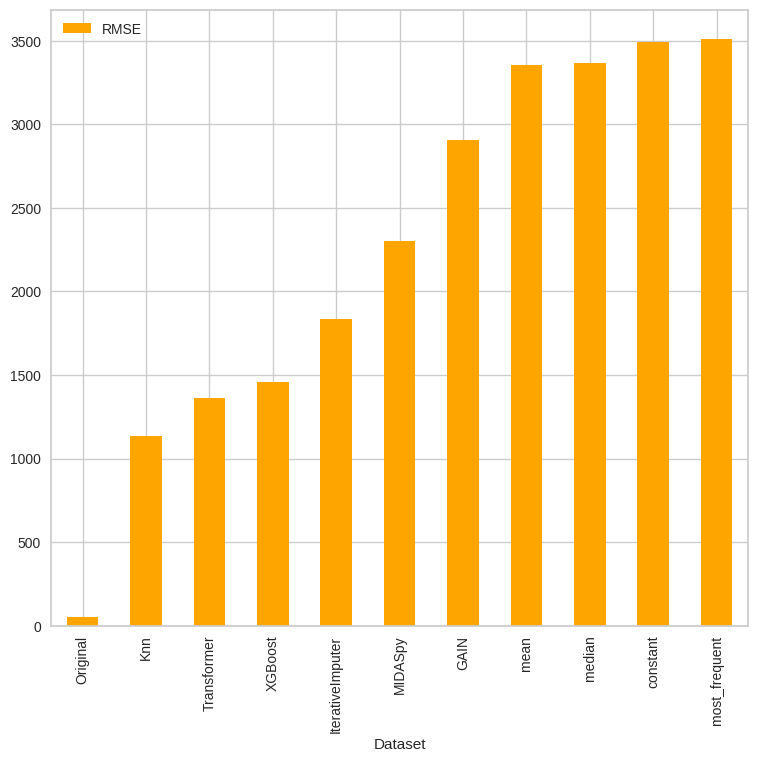

In [ ]:
resultados.sort_values(by=['RMSE'], ascending=True).plot(x='Dataset', y=["RMSE"], kind="bar", figsize=(9, 8), color='orange')

### R2 - Grafica

En otras palabras que tan bien se ajusta el modelo a las observaciones reales que tenemos.

<Axes: xlabel='Dataset'>

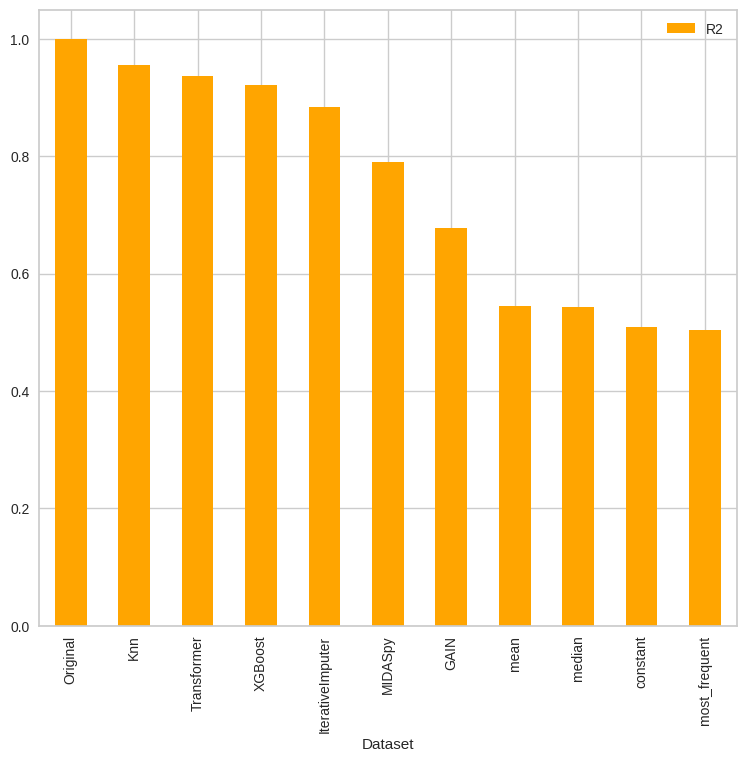

In [ ]:
resultados.sort_values(by=['R2'], ascending=False).plot(x='Dataset', y=["R2"], kind="bar", figsize=(9, 8), color='orange')

# Definicion de metricas

https://medium.com/@nicolasarrioja/m%C3%A9tricas-en-regresi%C3%B3n-5e5d4259430b

MAE= promedio de los errores absolutos

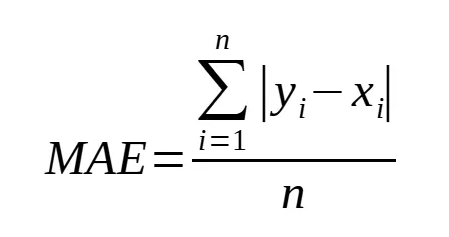

MSE= Error cuadratico promedio

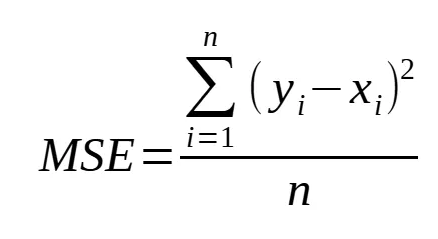



RMSE =  la anterior en unidades normales

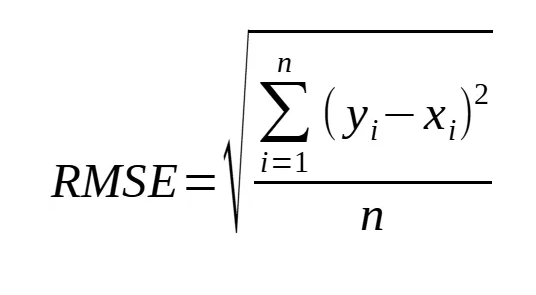


R2 , R cuadrada
R2  indica que tanta variación tiene la variable dependiente que se puede predecir desde la variable independiente.


En otras palabras que tan bien se ajusta el modelo a las observaciones reales que tenemos.

 R2 mejor es 1 y el peor es 0.

 Una desventaja que tiene es que asume que cada variable ayuda a explicar la variación en la predicción, lo cual no siempre es cierto.

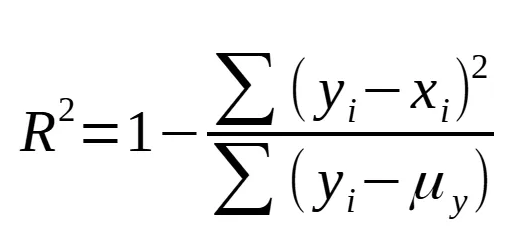


RMSLE

Mide la proporción entre la predicción y el actual. Muchos se preguntan por que necesitamos usar logaritmos. Si recordamos un problema que existe con RMSE es la sensibilidad a los outliers, esto nos puede llevar a que el valor del error se incremente mucho. Al usar los logaritmos, los outliers se ven escalados por lo que evitamos ese efecto. más cercano sea el valor a 0, es mejor

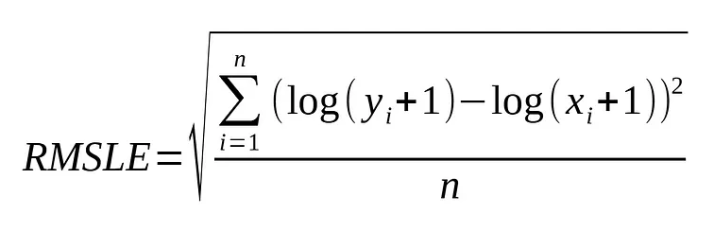


MAPE

Esta es una métrica de la precisión, pero se presenta como si fuera un porcentaje, como ventaja tiene que es independiente de la escala y fácil de interpretar. Como desventaja es que puede producir valores no definidos, infinito o muy cercanos a cero.

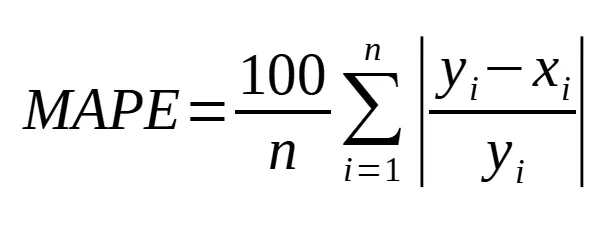

Cuando usar?

MSE y RMSE penalizan los errores grandes en la predicción, pero RMSE se usa más gracias a que esta en las unidades originales de los datos.

MAE es más robusto cuando los datos tienen outliers o datos atípicos y es la mejor opción a usar en esos casos.

R2 y R2 ajustado se usan para explicar que tan bien la variable independiente en la regresión lineal explica la variabilidad de la variable dependiente.


Para comparar la precisión entre diferentes modelos de regresión lineal generalmente es mejor usar RMSE que R2